# Computer Assignment 2

In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

#### Problem 1

In [90]:
#2D Convolution Function Implementation
def conv2d(image, filter):
    m, n = filter.shape
    image = image.astype(np.float32)             #convert unsigned image to float image
    padded_image = np.pad(image, m - 1, 'constant', constant_values=0)      #pad outside region of image with 0
    y, x = image.shape         #To output the image of same size as of original
    conv_image = np.zeros((y, x))
    for i in range(y):
        for j in range(x):
          #Sum all the elements after element wise multiplication
          conv_image[i][j] = np.sum(padded_image[i:i + m, j:j + n] * filter)
    return conv_image

In [91]:
def normalize_image(img):
  img = ((img - np.min(img)) * 255/ (np.max(img) - np.min(img))).astype('uint8')
  return img


In [126]:
# Calculate and Display Log Spectrum of Original Image, Filtered Image and Filter
def plot_filtering(image, filter):
  conv_img = conv2d(image, filter)
  conv_img = ((conv_img - np.min(conv_img)) * 255/ (np.max(conv_img) - np.min(conv_img))).astype('uint8')

  plt.figure(figsize = (15,7))
  plt.subplot(1, 2, 1)
  plt.imshow(image, cmap='gray')
  plt.title('Original Image')
  # pos = plt.add_axes([0.93, 0.1, 0.02, 0.35])  # Set colorbar position in fig
  cbr = plt.colorbar(location = 'right')  # Create the colorbar


  plt.subplot(1, 2, 2)
  plt.imshow(conv_img, cmap='gray')
  plt.title('Filtered Image')
  # pos = plt.add_axes([0.93, 0.1, 0.02, 0.35])  # Set colorbar position in fig
  cbr = plt.colorbar(location = 'right')  # Create the colorbar
  plt.show()

  #Calculate log spectrum of original image
  fft_original = np.fft.fft2(image)
  fshift = np.fft.fftshift(fft_original)
  magnitude_spectrum_original = 20*np.log(np.abs(fshift)+1)
  
  #Calculate log spectrum of filtered image
  fft_conv_img = np.fft.fft2(conv_img)
  fshift = np.fft.fftshift(fft_conv_img)
  magnitude_spectrum_conv_img = 20*np.log(np.abs(fshift)+1)
  

  #Calculate log spectrum of filter
  fft_filter = np.fft.fft2(filter, s=[img.shape[0], img.shape[1]])
  fshift = np.fft.fftshift(fft_filter)
  magnitude_spectrum_filter = 20*np.log(np.abs(fshift)+1)

  plt.figure(figsize = (15,7))
  plt.subplot(1, 3, 1)
  plt.imshow(magnitude_spectrum_original, cmap='gray')
  plt.title('Original Image Log Spectrum')
  cbr = plt.colorbar(location = 'right')  # Create the colorbar
  plt.subplot(1, 3, 2)
  plt.imshow(magnitude_spectrum_conv_img, cmap='gray')
  plt.title('Filtered Image Log Spectrum')
  cbr = plt.colorbar(location = 'right')  # Create the colorbar
  plt.subplot(1, 3, 3)
  plt.imshow(magnitude_spectrum_filter, cmap='gray')
  plt.title('Filter Log Spectrum')
  cbr = plt.colorbar(location = 'right')  # Create the colorbar
  plt.show()


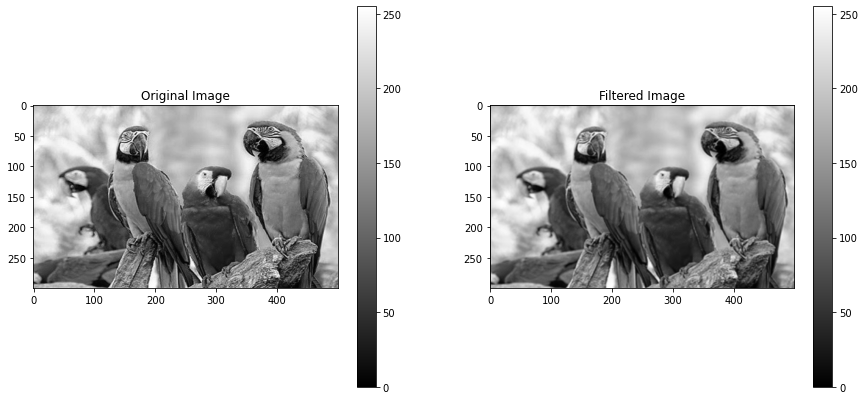

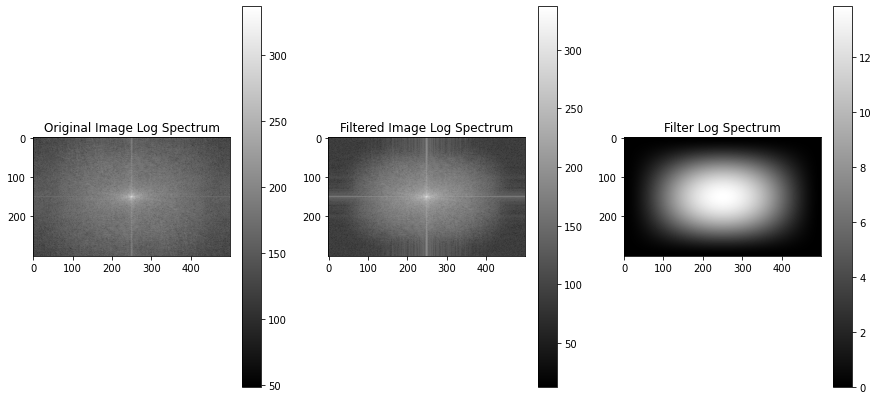

In [127]:
img = cv2.imread("bird2.jpg") #By Default it loads as BGR
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #converts color space from BGR to Grayspace

filter1 = np.array([[1, 2, 1],
                    [2, 4, 2],
                    [1, 2, 1]])/16

plot_filtering(img_gray, filter1)

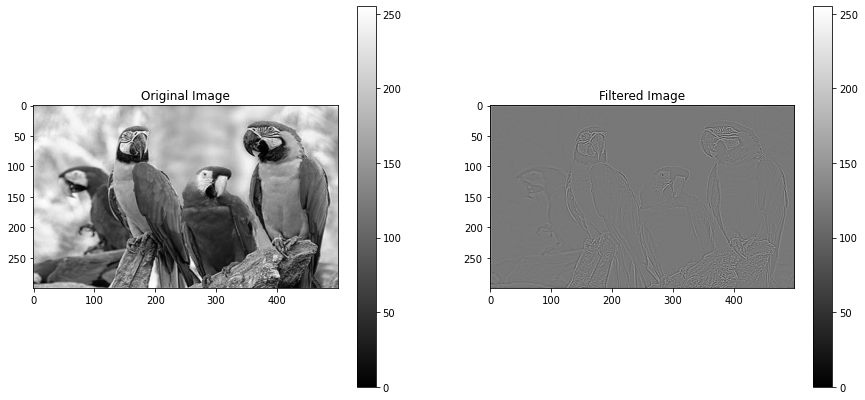

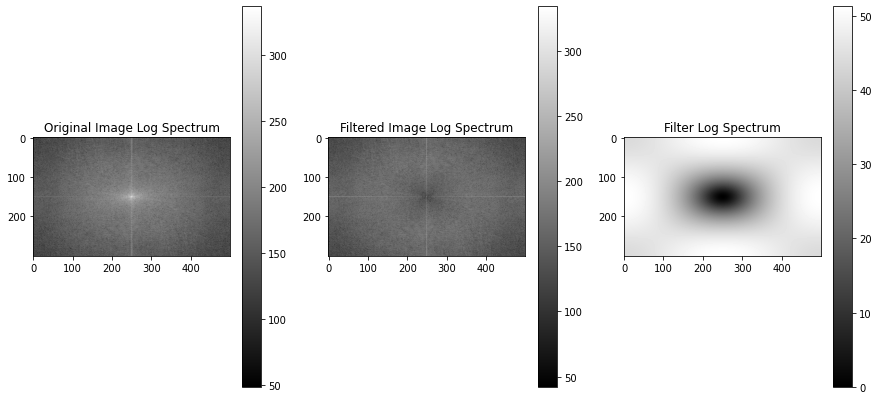

In [128]:
filter2 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

plot_filtering(img_gray, filter2)

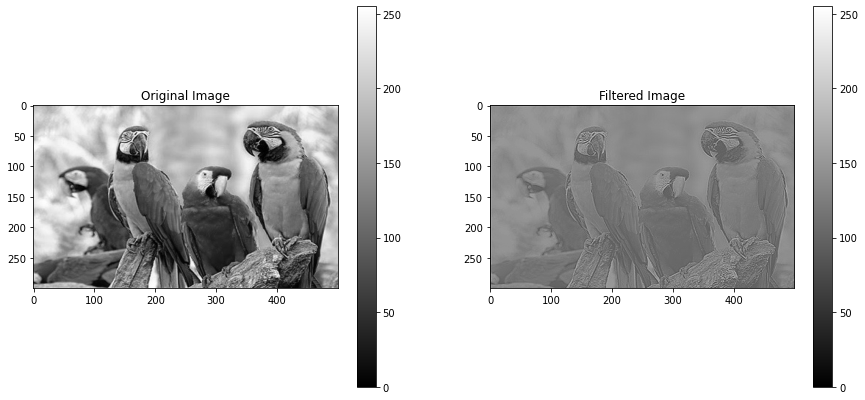

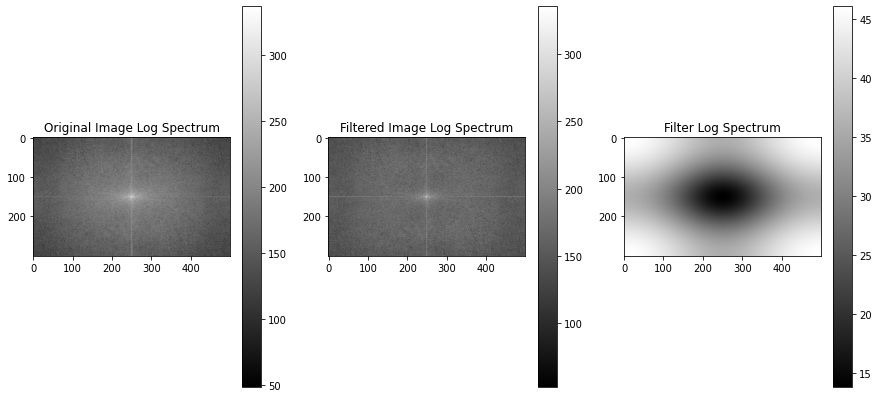

In [129]:
filter3 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

plot_filtering(img_gray, filter3)

##### H1 is a low pass filter which loss high freq information and blur the image
##### H2, H3 is high pass filters which loss low freq infromation and extra edges
##### H2 balance edge from all direction while H3 loss infromation on Horizontal and Vertical edges

#### Problem 2

In [96]:
def awgn(image, sigma):
  noise = np.random.normal(0, sigma, image.shape)
  return np.add(image, noise)


In [97]:
def gaussian_filter(sigma):
  size = math.ceil(5*sigma)
  x = np.arange(-int(size/2), int(size/2)+1)
  y = np.arange(-int(size/2), int(size/2)+1)
  x2d, y2d = np.meshgrid(x, y)
  kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
  kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2) # unit integral
  kernel_2d = kernel_2d/np.sum(kernel_2d) 
  return kernel_2d

In [98]:
def average_filter(size):
  return np.ones((size, size)) / (size ** 2)

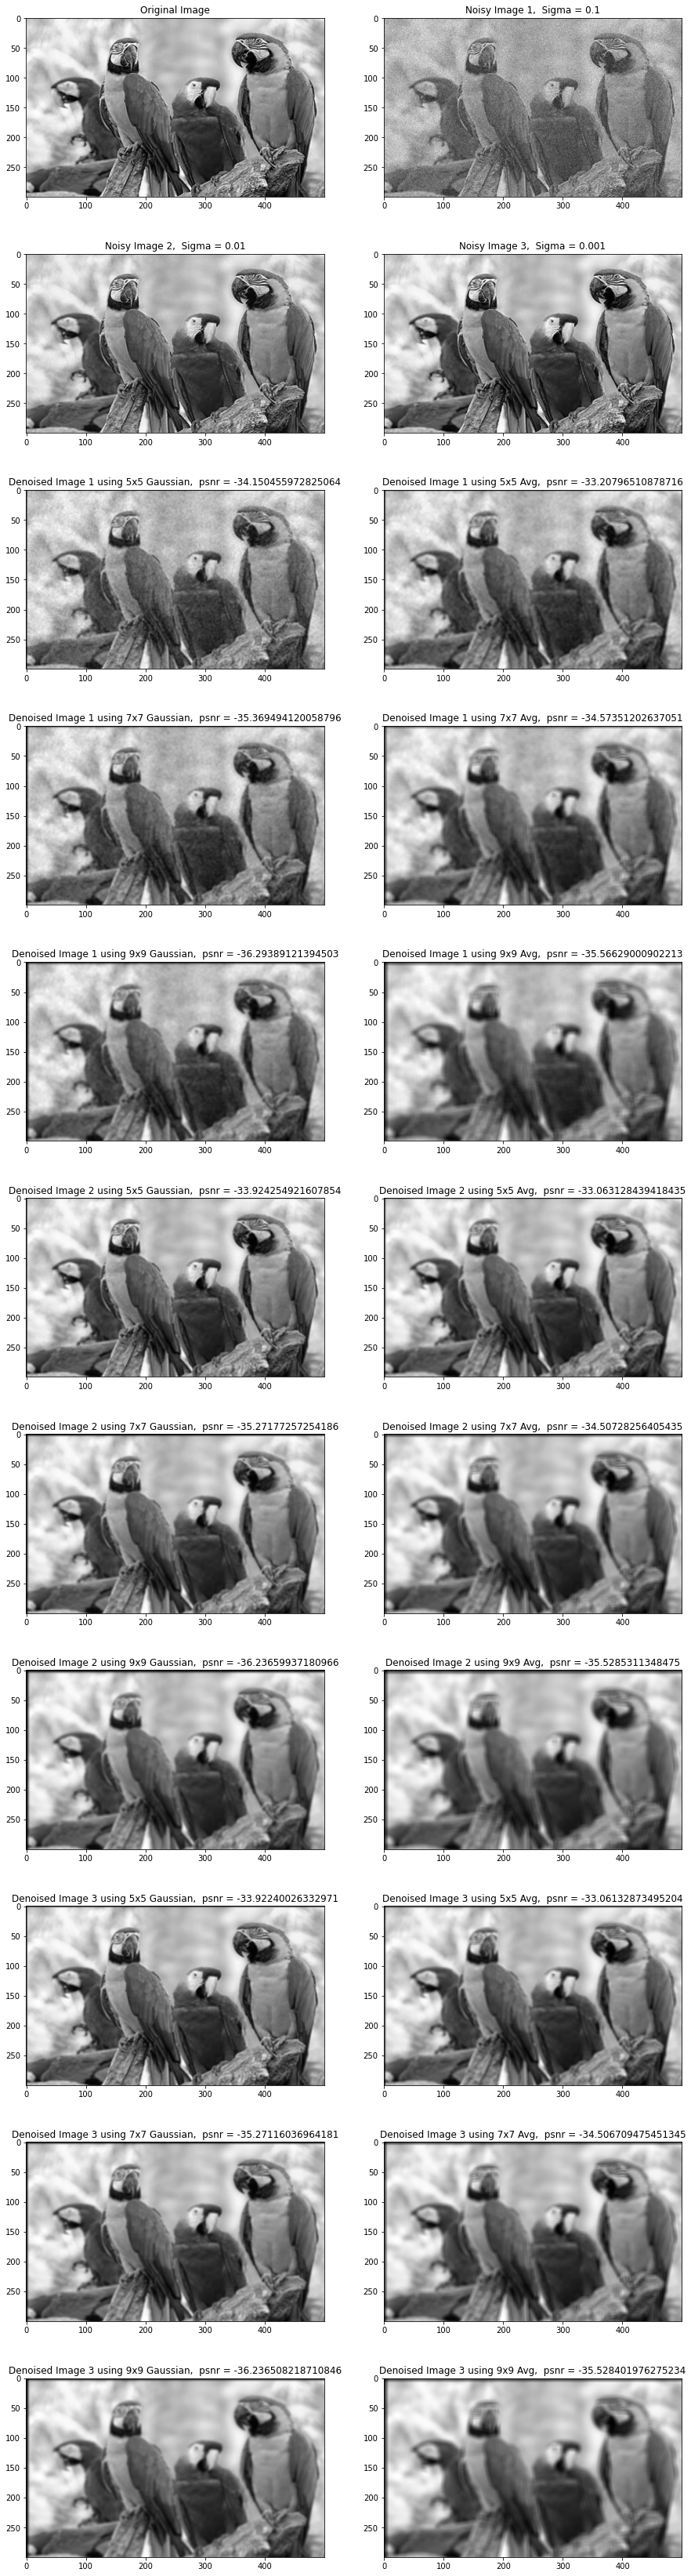

In [99]:
image = cv2.imread("bird2.jpg", 0) #Read image as grayscale
image = image.astype(np.float32)
image = (image - np.min(image)) / (np.max(image) - np.min(image))      #Rescale intensity values between [0,1]

noisy_image_1 = awgn(image, 0.1)
noisy_image_2 = awgn(image, 0.01)
noisy_image_3 = awgn(image, 0.001)

psnr_noisy_image_1 = -10 * math.log10(np.sum((noisy_image_1 - image)**2))
psnr_noisy_image_2 = -10 * math.log10(np.sum((noisy_image_2 - image)**2))
psnr_noisy_image_3 = -10 * math.log10(np.sum((noisy_image_3 - image)**2))

gaussian_filter_1 = gaussian_filter(5/5)
gaussian_filter_2 = gaussian_filter(7/5)
gaussian_filter_3 = gaussian_filter(9/5)

average_filter_1 = average_filter(5)
average_filter_2 = average_filter(7)
average_filter_3 = average_filter(9)

filtered_image_1_gauss = conv2d(noisy_image_1, gaussian_filter_1)
filtered_image_1_avg = conv2d(noisy_image_1, average_filter_1)
psnr_filtered_image_1_gauss = -10 * math.log10(np.sum((filtered_image_1_gauss - image)**2))
psnr_filtered_image_1_avg = -10 * math.log10(np.sum((filtered_image_1_avg - image)**2))

filtered_image_2_gauss = conv2d(noisy_image_1, gaussian_filter_2)
filtered_image_2_avg = conv2d(noisy_image_1, average_filter_2)
psnr_filtered_image_2_gauss = -10 * math.log10(np.sum((filtered_image_2_gauss - image)**2))
psnr_filtered_image_2_avg = -10 * math.log10(np.sum((filtered_image_2_avg - image)**2))

filtered_image_3_gauss = conv2d(noisy_image_1, gaussian_filter_3)
filtered_image_3_avg = conv2d(noisy_image_1, average_filter_3)
psnr_filtered_image_3_gauss = -10 * math.log10(np.sum((filtered_image_3_gauss - image)**2))
psnr_filtered_image_3_avg = -10 * math.log10(np.sum((filtered_image_3_avg - image)**2))

filtered_image_4_gauss = conv2d(noisy_image_2, gaussian_filter_1)
filtered_image_4_avg = conv2d(noisy_image_2, average_filter_1)
psnr_filtered_image_4_gauss = -10 * math.log10(np.sum((filtered_image_4_gauss - image)**2))
psnr_filtered_image_4_avg = -10 * math.log10(np.sum((filtered_image_4_avg - image)**2))

filtered_image_5_gauss = conv2d(noisy_image_2, gaussian_filter_2)
filtered_image_5_avg = conv2d(noisy_image_2, average_filter_2)
psnr_filtered_image_5_gauss = -10 * math.log10(np.sum((filtered_image_5_gauss - image)**2))
psnr_filtered_image_5_avg = -10 * math.log10(np.sum((filtered_image_5_avg - image)**2))

filtered_image_6_gauss = conv2d(noisy_image_2, gaussian_filter_3)
filtered_image_6_avg = conv2d(noisy_image_2, average_filter_3)
psnr_filtered_image_6_gauss = -10 * math.log10(np.sum((filtered_image_6_gauss - image)**2))
psnr_filtered_image_6_avg = -10 * math.log10(np.sum((filtered_image_6_avg - image)**2))

filtered_image_7_gauss = conv2d(noisy_image_3, gaussian_filter_1)
filtered_image_7_avg = conv2d(noisy_image_3, average_filter_1)
psnr_filtered_image_7_gauss = -10 * math.log10(np.sum((filtered_image_7_gauss - image)**2))
psnr_filtered_image_7_avg = -10 * math.log10(np.sum((filtered_image_7_avg - image)**2))

filtered_image_8_gauss = conv2d(noisy_image_3, gaussian_filter_2)
filtered_image_8_avg = conv2d(noisy_image_3, average_filter_2)
psnr_filtered_image_8_gauss = -10 * math.log10(np.sum((filtered_image_8_gauss - image)**2))
psnr_filtered_image_8_avg = -10 * math.log10(np.sum((filtered_image_8_avg - image)**2))

filtered_image_9_gauss = conv2d(noisy_image_3, gaussian_filter_3)
filtered_image_9_avg = conv2d(noisy_image_3, average_filter_3)
psnr_filtered_image_9_gauss = -10 * math.log10(np.sum((filtered_image_9_gauss - image)**2))
psnr_filtered_image_9_avg = -10 * math.log10(np.sum((filtered_image_9_avg - image)**2))


plt.figure(figsize = (15,60))

plt.subplot(11, 2, 1)
plt.imshow(image, cmap = 'gray')
plt.title("Original Image")

plt.subplot(11, 2, 2)
plt.imshow(noisy_image_1, cmap = 'gray')
plt.title("Noisy Image 1,  Sigma = " + str(0.1))

plt.subplot(11, 2, 3)
plt.imshow(noisy_image_2, cmap = 'gray')
plt.title("Noisy Image 2,  Sigma = " + str(0.01))

plt.subplot(11, 2, 4)
plt.imshow(noisy_image_3, cmap = 'gray')
plt.title("Noisy Image 3,  Sigma = " + str(0.001))
###
plt.subplot(11, 2, 5)
plt.imshow(filtered_image_1_gauss, cmap = 'gray')
plt.title("Denoised Image 1 using 5x5 Gaussian,  psnr = " + str(psnr_filtered_image_1_gauss))

plt.subplot(11, 2, 6)
plt.imshow(filtered_image_1_avg, cmap = 'gray')
plt.title("Denoised Image 1 using 5x5 Avg,  psnr = " + str(psnr_filtered_image_1_avg))
####
plt.subplot(11, 2, 7)
plt.imshow(filtered_image_2_gauss, cmap = 'gray')
plt.title("Denoised Image 1 using 7x7 Gaussian,  psnr = " + str(psnr_filtered_image_2_gauss))

plt.subplot(11, 2, 8)
plt.imshow(filtered_image_2_avg, cmap = 'gray')
plt.title("Denoised Image 1 using 7x7 Avg,  psnr = " + str(psnr_filtered_image_2_avg))
####
plt.subplot(11, 2, 9)
plt.imshow(filtered_image_3_gauss, cmap = 'gray')
plt.title("Denoised Image 1 using 9x9 Gaussian,  psnr = " + str(psnr_filtered_image_3_gauss))

plt.subplot(11, 2, 10)
plt.imshow(filtered_image_3_avg, cmap = 'gray')
plt.title("Denoised Image 1 using 9x9 Avg,  psnr = " + str(psnr_filtered_image_3_avg))
####
plt.subplot(11, 2, 11)
plt.imshow(filtered_image_4_gauss, cmap = 'gray')
plt.title("Denoised Image 2 using 5x5 Gaussian,  psnr = " + str(psnr_filtered_image_4_gauss))

plt.subplot(11, 2, 12)
plt.imshow(filtered_image_4_avg, cmap = 'gray')
plt.title("Denoised Image 2 using 5x5 Avg,  psnr = " + str(psnr_filtered_image_4_avg))
###
plt.subplot(11, 2, 13)
plt.imshow(filtered_image_5_gauss, cmap = 'gray')
plt.title("Denoised Image 2 using 7x7 Gaussian,  psnr = " + str(psnr_filtered_image_5_gauss))

plt.subplot(11, 2, 14)
plt.imshow(filtered_image_5_avg, cmap = 'gray')
plt.title("Denoised Image 2 using 7x7 Avg,  psnr = " + str(psnr_filtered_image_5_avg))
###
plt.subplot(11, 2, 15)
plt.imshow(filtered_image_6_gauss, cmap = 'gray')
plt.title("Denoised Image 2 using 9x9 Gaussian,  psnr = " + str(psnr_filtered_image_6_gauss))

plt.subplot(11, 2, 16)
plt.imshow(filtered_image_6_avg, cmap = 'gray')
plt.title("Denoised Image 2 using 9x9 Avg,  psnr = " + str(psnr_filtered_image_6_avg))
####
plt.subplot(11, 2, 17)
plt.imshow(filtered_image_7_gauss, cmap = 'gray')
plt.title("Denoised Image 3 using 5x5 Gaussian,  psnr = " + str(psnr_filtered_image_7_gauss))

plt.subplot(11, 2, 18)
plt.imshow(filtered_image_7_avg, cmap = 'gray')
plt.title("Denoised Image 3 using 5x5 Avg,  psnr = " + str(psnr_filtered_image_7_avg))
###
plt.subplot(11, 2, 19)
plt.imshow(filtered_image_8_gauss, cmap = 'gray')
plt.title("Denoised Image 3 using 7x7 Gaussian,  psnr = " + str(psnr_filtered_image_8_gauss))

plt.subplot(11, 2, 20)
plt.imshow(filtered_image_8_avg, cmap = 'gray')
plt.title("Denoised Image 3 using 7x7 Avg,  psnr = " + str(psnr_filtered_image_8_avg))
###
plt.subplot(11, 2, 21)
plt.imshow(filtered_image_9_gauss, cmap = 'gray')
plt.title("Denoised Image 3 using 9x9 Gaussian,  psnr = " + str(psnr_filtered_image_9_gauss))

plt.subplot(11, 2, 22)
plt.imshow(filtered_image_9_avg, cmap = 'gray')
plt.title("Denoised Image 3 using 9x9 Avg,  psnr = " + str(psnr_filtered_image_9_avg))
###
plt.show()







##### Avg filter denoise better as size of filter increases but blurs the image too much
##### Gaussian filter denoise image better than Avg filter and moreover does not blur the image significantly
##### As filter size, increases, denoises-ness increases but blurness also increases.